In [1]:
num_eps = [6,22,24,14,26,26,24,24,23]
episodes = []
epnames = []
for season in range(1,10):
    for ep in range(1,num_eps[season-1]+1):
        if ep < 10:
            ep_str = "s0" + str(season) + "e0" + str(ep)
        else:
            ep_str = "s0" + str(season) + "e" + str(ep)
        if (not (ep == 11 and season == 3) and not (season == 6 and (ep == 5 or ep == 18))):
            with open(ep_str, "r") as file:
                episodes.append(file.readline())
                epnames.append(ep_str)
        

In [2]:
with open("allep", "w+") as file:
    for episode in episodes:
        file.write(episode)
        file.write("\n")

In [3]:
import spacy

In [4]:
sp = spacy.load('en_core_web_sm')

In [5]:
sentence2 = sp("Manchester United isn't looking to sign any forward. Bla.")

In [6]:
for word in sentence2:  
    print(word.text)

Manchester
United
is
n't
looking
to
sign
any
forward
.
Bla
.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from html import unescape

In [61]:
class MyAnalyzer(object):
    
    # load spaCy's english model and define the tokenizer/lemmatizer
    def __init__(self):
        spacy.load('en')
        self.lemmatizer_ = spacy.lang.en.English()
        
    # allow the class instance to be called just like
    # just like a function and applies the preprocessing and
    # tokenize the document
    def __call__(self, doc):
        doc_clean = unescape(doc).lower().replace("-"," ")
        #tokens = sp(doc_clean)
        #return([token.text for token in tokens])
        tokens = self.lemmatizer_(doc_clean)
        return([token.lemma_ for token in tokens])

    
#vectorizer = CustomVectorizer(stop_words = 'english')
analyzer = MyAnalyzer()
vectorizer = CountVectorizer(analyzer=analyzer, stop_words='english')

In [65]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(episodes)

In [66]:
df = pd.DataFrame(X.toarray())

In [67]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [68]:
for i in vectorizer.get_feature_names():
    if '-' in i:
        print(i)

In [69]:
diffdf = pd.DataFrame(df.loc[138,] - [n/186 for n in df.sum(axis=0)])

In [70]:
vectorizer.get_feature_names()[0]

'00'

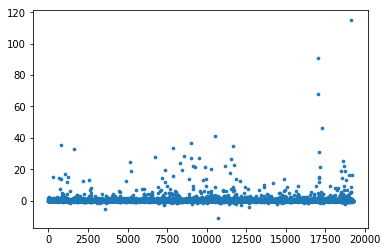

In [71]:
from matplotlib import pyplot as plt
f1 = list(range(0,diffdf.shape[0]))
f2 = diffdf[138]
plt.scatter(f1, f2, s=7)

In [72]:
diffdf.head()

,138
0,1.354839
1,1.521505
2,-0.005376
3,-0.005376
4,-0.005376


In [73]:
pd.DataFrame.idxmax(diffdf,axis=0)

138    19151
dtype: int64

In [74]:
df.shape

(186, 19238)

In [75]:
df = df.div(df.sum(axis=1), axis=0)

In [76]:
df.to_csv("bow.tsv", sep='\t', header=vectorizer.get_feature_names(), index=False)

In [77]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(df)
X_transformed.shape

(186, 2)

In [78]:
dft = pd.DataFrame(X_transformed)
dft.head()

,0,1
0,-0.007842,-0.024038
1,-0.030875,0.009647
2,-0.030736,-0.010694
3,-0.015404,0.029434
4,0.002300,0.036085


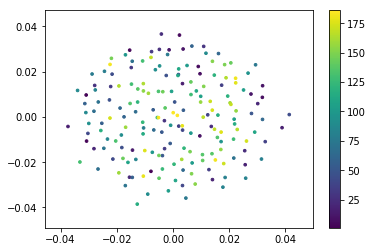

In [79]:
from matplotlib import pyplot as plt
f1 = dft[0].values
f2 = dft[1].values
c = list(range(1,187))
plt.scatter(f1, f2, c=c, s=7)
plt.colorbar()

In [80]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(dft.values, metric='euclidean')
dist_matrix = squareform(distances)


In [81]:
dMatrix = pd.DataFrame(dist_matrix)

In [90]:
dMatrix.loc[80,81]

0.0073239587654744046

In [28]:
dft.index[dft[0] > 0.05].tolist()

[40, 128]

In [30]:
epnames[128]

's07e14'

In [29]:
epnames[40]

's03e14'

In [84]:
epnames[80]

's05e16'

In [26]:
epnames[138]

's07e24'

In [67]:
pd.DataFrame.idxmax(dft,axis=0)

0    102
1     15
dtype: int64

In [83]:
dMatrix.to_csv("dist.tsv", sep=',', header=epnames, index=False)

In [ ]:
from skbio.stats.distance import DissimilarityMatrix
dm = DissimilarityMatrix()